In [22]:
import sympy as sym
from sympy import symbols

a0, a1,a2, a3, a4, a5 = symbols('a0:6')
y0,yf,tf = symbols('y0,yf,tf')

eq1=sym.Eq(a5*0 **5 + a4*0 **4 + a3*0 **3 + a2*0**2 + a1*0 + a0, y0)
eq2=sym.Eq(a5*tf **5 + a4*tf **4 + a3*tf **3 + a2*tf**2 + a1*tf + a0, yf)
eq3=sym.Eq(5*a5*tf **4 + 4*a4*tf **3 + 3*a3*tf**2 + 2*a2*tf  + a1,0)
eq4=sym.Eq(5*a5*0 **4 + 4*a4*0 **3 + 3*a3*0**2 + 2*a2*0 + a1,0)
eq5= sym.Eq(20*a5*tf**3 + 12*a4*tf**2 + 6*a3*tf +2*a2,0)
eq6= sym.Eq(20*a5*0**3 + 12*a4*0**2 + 6*a3*0 +2*a2,0)

result = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6],(a0, a1,a2, a3, a4, a5))
print(result)

{a0: y0, a1: 0, a2: 0, a3: (-10*y0 + 10*yf)/tf**3, a4: (15*y0 - 15*yf)/tf**4, a5: (-6*y0 + 6*yf)/tf**5}


0.1874939517592321


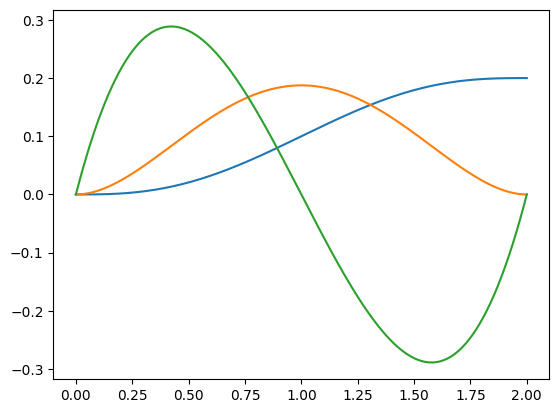

In [4]:
import numpy as np
import matplotlib.pyplot as plt


y0 = 0
yf = 0.2

tf = 2
     # period
dt = 0.02
t = 0
tf_all = 0 # all periods of movement 
right = 0
left = 1



a0 = y0
a1 = 0
a2 = 0
a3 = -(10/(tf **3))*(y0-yf)
a4 = (15/(tf  **4))*(y0-yf)
a5 = -(6/(tf  **5))*(y0-yf)

poly = [a5*t **5 + a4*t **4 + a3*t **3 + a2*t**2 + a1*t + a0 for t in np.linspace(0,tf,250) ]
#derivative 
poly_der = [ 5*a5*t **4 + 4*a4*t **3 + 3*a3*t**2 + 2*a2*t  + a1  for t in np.linspace(0,tf,250)]  
poly_der2 = [ 20*a5*t**3 + 12*a4*t**2 + 6*a3*t +2*a2 for t in np.linspace(0,tf,250)]

print(max(poly_der))
#print(poly_der)


t = np.linspace(0,tf,250)

plt.figure(0)
plt.plot(t,poly)
plt.plot(t,poly_der)
plt.plot(t,poly_der2)



In [25]:
from sympy import symbols, cos, sin, pi
from sympy.matrices import Matrix
from numpy.linalg import norm

# Define symbolic variables
q1, q2, q3, q4, q5, q6, q7 = symbols('q1:8')

l1 = 0.267
l2 = 0.293
l3 = 0.0525
l4 = 0.3512
l5 = 0.1232

theta1 = 0.2225 #(rad) (=12.75deg)
theta2 = 0.6646 #(rad) (=38.08deg)

# Define rotation matrices
def R_x(q):
    return Matrix([[1, 0, 0,0],
                   [0, cos(q), -sin(q),0],
                   [0, sin(q), cos(q),0],
                   [0, 0, 0, 1]])

def R_z(q):
    return Matrix([[cos(q), -sin(q), 0,0],
                   [sin(q), cos(q), 0,0],
                   [0, 0, 1,0],
                   [0, 0, 0, 1]])
# Define translation matrices
def T_x(d):
    return Matrix([[1, 0, 0, d],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

def T_z(d):
    return Matrix([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, d],
                   [0, 0, 0, 1]])

# Define functions for each transformation matrix
def A_01(q1):
    return R_z(q1) @ T_z(l1)

def A_02(q1, q2):
    return  A_01(q1)@ R_x(-pi/2) @ R_z(q2)

def A_03(q1, q2, q3):
    return A_02(q1, q2)@  R_x(pi/2) @ R_z(q3) @ T_z(l2)

def A_04(q1, q2, q3, q4):
    return A_03(q1, q2, q3)@ R_x(pi/2) @ T_x(l3) @ R_z(q4)

def A_05(q1, q2, q3, q4, q5):
    return  A_04(q1, q2, q3, q4)@ R_x(pi/2) @ T_x(l4*sin(theta1))@ R_z(q5) @ T_z(l4*cos(theta1))

def A_06(q1, q2, q3, q4, q5, q6):
    return  A_05(q1, q2, q3, q4, q5)@ R_x(pi/2) @ R_z(q6)

def A_07(q1, q2, q3, q4, q5, q6, q7):
    return  A_06(q1, q2, q3, q4, q5, q6)@ R_x(-pi/2) @ T_x(l5*sin(theta2)) @ R_z(q7) @ T_z(l5*cos(theta2))


print("A01 = ")
print(A_01(q1))
print("\nA02 = ")
print(A_02(q1,q2))
print("\nA03 = ")
print(A_03(q1,q2,q3))
print("\nA04 = ")
print(A_04(q1,q2,q3,q4))
print("\nA05 = ")
print(A_05(q1,q2,q3,q4,q5))
print("\nA06 = ")
print(A_06(q1,q2,q3,q4,q5,q6))
print("\nA07 = ")
print(A_07(q1,q2,q3,q4,q5,q6,q7))




A01 = 
Matrix([[cos(q1), -sin(q1), 0, 0], [sin(q1), cos(q1), 0, 0], [0, 0, 1, 0.267000000000000], [0, 0, 0, 1]])

A02 = 
Matrix([[cos(q1)*cos(q2), -sin(q2)*cos(q1), -sin(q1), 0], [sin(q1)*cos(q2), -sin(q1)*sin(q2), cos(q1), 0], [-sin(q2), -cos(q2), 0, 0.267000000000000], [0, 0, 0, 1]])

A03 = 
Matrix([[-sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3), -sin(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2), sin(q2)*cos(q1), 0.293*sin(q2)*cos(q1)], [sin(q1)*cos(q2)*cos(q3) + sin(q3)*cos(q1), -sin(q1)*sin(q3)*cos(q2) + cos(q1)*cos(q3), sin(q1)*sin(q2), 0.293*sin(q1)*sin(q2)], [-sin(q2)*cos(q3), sin(q2)*sin(q3), cos(q2), 0.293*cos(q2) + 0.267], [0, 0, 0, 1]])

A04 = 
Matrix([[(-sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3))*cos(q4) + sin(q2)*sin(q4)*cos(q1), -(-sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3))*sin(q4) + sin(q2)*cos(q1)*cos(q4), sin(q1)*cos(q3) + sin(q3)*cos(q1)*cos(q2), -0.0525*sin(q1)*sin(q3) + 0.293*sin(q2)*cos(q1) + 0.0525*cos(q1)*cos(q2)*cos(q3)], [(sin(q1)*cos(q2)*cos(q3) + sin(q3)*cos(q1))*cos(q

In [11]:
import sympy as sym
x,y = sym.symbols('x,y')
y0,yf= sym.symbols('y0,yf')
eq1 = sym.Eq(x+y,y0)
eq2 = sym.Eq(x**2+y**2,yf)
result = sym.solve([eq1,eq2],(x,y))
print(result)

[(y0/2 - sqrt(-y0**2 + 2*yf)/2, y0/2 + sqrt(-y0**2 + 2*yf)/2), (y0/2 + sqrt(-y0**2 + 2*yf)/2, y0/2 - sqrt(-y0**2 + 2*yf)/2)]


In [24]:
from sympy import symbols, cos, sin, pi
from sympy.matrices import Matrix
from numpy.linalg import norm
import sympy as sym 

q1,q2,q3,q4 = symbols('q1:5')
l,s2,s23,c2,c23 = symbols('l,s2,s23,c2,c23')

J = Matrix([[1, -l*sin(q2)-l*sin(q2+q3)-sin(q2+q3)*q4, -l*sin(q2+q3)-sin(q2+q3)*q4, cos(q2+q3)],\
           [0, -l*cos(q2)-l*cos(q2+q3)-cos(q2+q3)*q4, -l*cos(q2+q3)-cos(q2+q3)*q4, sin(q2+q3)]])

#print(J.shape)
pinvJ= sym.simplify((J.T) @ sym.simplify(((J @ (J.T)).inv())))

print(pinvJ.shape)



(4, 2)


In [30]:
B = sym.simplify((J @ (J.T)).inv())

print (B)

Matrix([[(c2**2*l**2 + 2*c2*c23*l**2 + 2*c2*c23*l*q4 + 2*c23**2*l**2 + 4*c23**2*l*q4 + 2*c23**2*q4**2 + s23**2)/(c2**2*c23**2*l**2 + c2**2*l**4*s23**2 + 2*c2**2*l**3*q4*s23**2 + c2**2*l**2*q4**2*s23**2 + c2**2*l**2 + 2*c2*c23**3*l**2 + 2*c2*c23**3*l*q4 - 2*c2*c23*l**4*s2*s23 - 4*c2*c23*l**3*q4*s2*s23 - 2*c2*c23*l**2*q4**2*s2*s23 - 2*c2*c23*l**2*s2*s23 - 2*c2*c23*l**2*s23**2 + 2*c2*c23*l**2 - 2*c2*c23*l*q4*s23**2 + 2*c2*c23*l*q4 + 2*c23**4*l**2 + 4*c23**4*l*q4 + 2*c23**4*q4**2 + c23**2*l**4*s2**2 + 2*c23**2*l**3*q4*s2**2 + c23**2*l**2*q4**2*s2**2 - 2*c23**2*l**2*s2*s23 - 4*c23**2*l**2*s23**2 + 2*c23**2*l**2 - 2*c23**2*l*q4*s2*s23 - 8*c23**2*l*q4*s23**2 + 4*c23**2*l*q4 - 4*c23**2*q4**2*s23**2 + 2*c23**2*q4**2 + l**2*s2**2*s23**2 + 2*l**2*s2*s23**3 + 2*l**2*s23**4 + 2*l*q4*s2*s23**3 + 4*l*q4*s23**4 + 2*q4**2*s23**4 + s23**2), (-c2*l**2*s2 - c2*l**2*s23 - c2*l*q4*s23 - c23*l**2*s2 - 2*c23*l**2*s23 - c23*l*q4*s2 - 4*c23*l*q4*s23 - 2*c23*q4**2*s23 - c23*s23)/(c2**2*c23**2*l**2 + c2**2*l**4*s